# Bias in AI - Project Implementation

This notebook carries out the tasks set out in the Project Proposal section, and generates all figures present in the report. Headers are aligned with the report headers for convenience.

## Data Analysis

In [56]:
import plotly.graph_objects as go

def show(fig: go.Figure, title: str = None, x_label: str = None, y_label: str = None) -> None:
    fig.update_layout(
        title=title,
        width=500, 
        height=500,
        font_family="Computer Modern",
        template="plotly_white",
        xaxis_title=x_label,
        yaxis_title=y_label,
    )
    fig.show()
    return fig

In [91]:
df = pd.read_csv("german.data", delimiter=" ", header=None)

In [93]:
import numpy as np
import pandas as pd

df = pd.read_csv("german.data", delimiter=" ", header=None)

dataset = pd.DataFrame(dict(
    months=df[1],
    amount=df[4],
    instalment_disp_pct=df[7],
    pres_residence=df[10],
    num_credits=df[15],
    maint_liab=df[17],
    gender=np.where(df[8].isin(("A91", "A93", "A94")), "Male", "Female"),
    age_in_years=df[12],
    age=np.where(df[12] >= 25, "Adult", "Youth"),
    existing_status=df[0].map(dict(A14="NONE", A11="NEG", A12="LOW", A13="MED")),
    credit_history=df[2].map(dict(A30="NONE", A31="ALWAYS_PAID", A32="CURRENT_PAID", A33="DELAY", A34="CRITICAL")),
    savings_account=df[5].map(dict(A65="UNKNOWN", A61="LOW", A62="MED", A63="HIGH_MED", A64="HIGH")),
    pres_employment=df[6].map(dict(A71="UNEMPLOYED", A72="<1YR", A73="1-4YRS", A74="4-7YRS", A75=">=7YRS")),
    prop=df[11].map(dict(A121="REAL_ESTATE", A122="BUILD_SOC", A123="OTHER", A124="UNKNOWN")),
    job=df[16].map(dict(A171="UNEMPLOYED", A172="UNSKILLED", A173="SKILLED", A174="MANAGEMENT")),
    risk=df[20] == 1,
))

CATEGORICAL = [
    "existing_status", 
    "pres_employment",
    "credit_history", 
    "savings_account",
    "prop",
    "job",
]

DEMOGRAPHIC = [
    "gender",
    "age",
]

for col in dataset.columns:
    if col not in CATEGORICAL + DEMOGRAPHIC:
        dataset[col] = dataset[col].astype(float)

In [94]:
from IPython.display import display, Markdown

def mean(x):
    return x.mean().round(2)

def variance(x):
    return x.var().round(2)

def top_1(x):
    return x.value_counts().index[0]

def top_2(x):
    return x.value_counts().index[1]

def top_3(x):
    try:
        return x.value_counts().index[2]
    except:
        return "N/A"

def na(x):
    return "N/A"

t = 1
for i, df in dataset.groupby(["gender", "age"]):
    summary = pd.DataFrame()
    for col in df.columns:
        if col in CATEGORICAL:
            summary[col] = [fn(df[col]) for fn in [na, na, top_1, top_2, top_3]]
        elif col not in DEMOGRAPHIC:
            summary[col] = [fn(df[col]) for fn in [mean, variance, na, na, na]]
    summary.index = ["Mean", "Variance", "Mode", "2nd", "3rd"]
    display(Markdown(f"{t}. {', '.join(i)}"))
    display(summary)
    t += 1

1. Female, Adult

,months,amount,instalment_disp_pct,pres_residence,num_credits,maint_liab,age_in_years,existing_status,credit_history,savings_account,pres_employment,prop,job,risk
Mean,19.57,2922.77,2.88,2.77,1.37,1.05,36.6,N/A,N/A,N/A,N/A,N/A,N/A,0.68
Variance,117.25,7021890.31,1.39,1.4,0.32,0.05,135.72,N/A,N/A,N/A,N/A,N/A,N/A,0.22
Mode,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NONE,CURRENT_PAID,LOW,1-4YRS,OTHER,SKILLED,N/A
2nd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,LOW,CRITICAL,UNKNOWN,<1YR,REAL_ESTATE,UNSKILLED,N/A
3rd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NEG,ALWAYS_PAID,MED,>=7YRS,BUILD_SOC,MANAGEMENT,N/A


2. Female, Youth

,months,amount,instalment_disp_pct,pres_residence,num_credits,maint_liab,age_in_years,existing_status,credit_history,savings_account,pres_employment,prop,job,risk
Mean,19.08,2756.73,2.68,3.14,1.2,1.02,22.6,N/A,N/A,N/A,N/A,N/A,N/A,0.57
Variance,136.39,6172016.63,1.57,1.16,0.16,0.02,1.81,N/A,N/A,N/A,N/A,N/A,N/A,0.25
Mode,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NEG,CURRENT_PAID,LOW,<1YR,OTHER,SKILLED,N/A
2nd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NONE,CRITICAL,MED,1-4YRS,REAL_ESTATE,UNSKILLED,N/A
3rd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,LOW,DELAY,UNKNOWN,4-7YRS,BUILD_SOC,UNEMPLOYED,N/A


3. Male, Adult

,months,amount,instalment_disp_pct,pres_residence,num_credits,maint_liab,age_in_years,existing_status,credit_history,savings_account,pres_employment,prop,job,risk
Mean,21.48,3471.77,3.05,2.86,1.47,1.22,38.25,N/A,N/A,N/A,N/A,N/A,N/A,0.73
Variance,150.52,8169780.78,1.14,1.11,0.36,0.17,109.99,N/A,N/A,N/A,N/A,N/A,N/A,0.2
Mode,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NONE,CURRENT_PAID,LOW,>=7YRS,OTHER,SKILLED,N/A
2nd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NEG,CRITICAL,UNKNOWN,1-4YRS,REAL_ESTATE,UNSKILLED,N/A
3rd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,LOW,DELAY,MED,4-7YRS,BUILD_SOC,MANAGEMENT,N/A


4. Male, Youth

,months,amount,instalment_disp_pct,pres_residence,num_credits,maint_liab,age_in_years,existing_status,credit_history,savings_account,pres_employment,prop,job,risk
Mean,22.31,3219.85,2.89,2.6,1.2,1.06,22.58,N/A,N/A,N/A,N/A,N/A,N/A,0.62
Variance,197.25,10855368.88,1.29,1.56,0.16,0.06,1.72,N/A,N/A,N/A,N/A,N/A,N/A,0.24
Mode,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NEG,CURRENT_PAID,LOW,1-4YRS,OTHER,SKILLED,N/A
2nd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,LOW,CRITICAL,UNKNOWN,4-7YRS,REAL_ESTATE,UNSKILLED,N/A
3rd,N/A,N/A,N/A,N/A,N/A,N/A,N/A,NONE,ALWAYS_PAID,MED,<1YR,BUILD_SOC,UNEMPLOYED,N/A


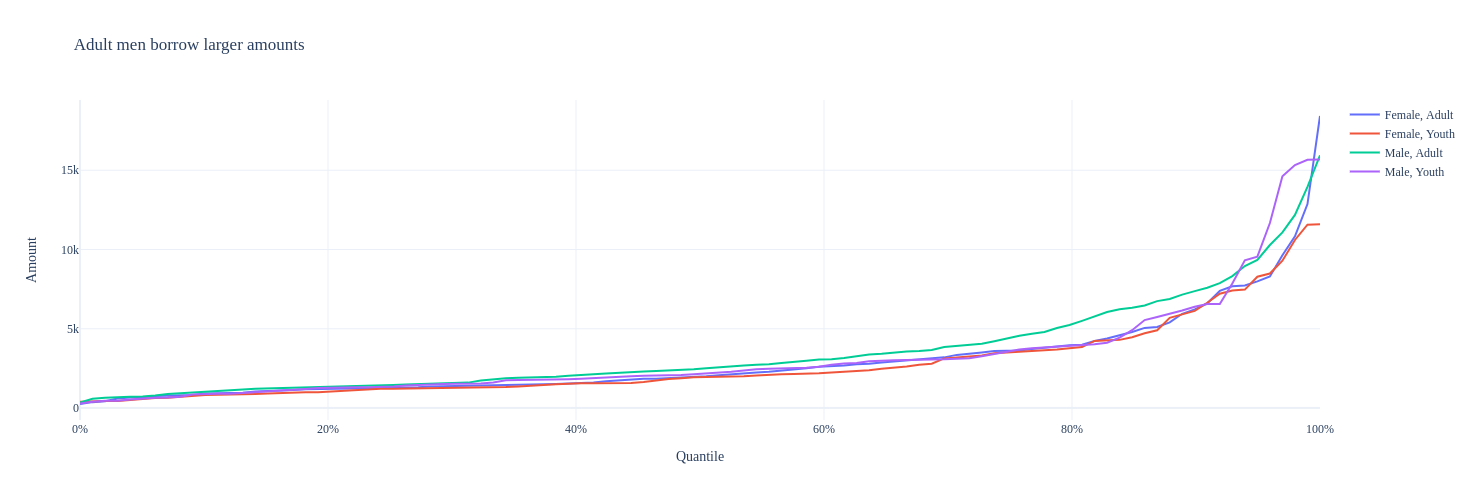

In [88]:
fig = go.Figure()

grouped = dataset.groupby(["gender", "age"])
groups = ["Female, Adult", "Female, Youth", "Male, Adult", "Male, Youth"]

for i, df in grouped:
    quantiles = np.linspace(0, 1, 100)
    fig.add_trace(go.Scatter(mode="lines", x=quantiles, y=df.amount.quantile(quantiles), name=", ".join(i)))
    
show(fig.update_layout(xaxis_tickformat="%"), "Adult men borrow larger amounts", "Quantile", "Amount").write_image("images/borrow_quantiles.pdf")

In [90]:
df

,months,amount,instalment_disp_pct,pres_residence,num_credits,maint_liab,gender,age_in_years,age,existing_status,credit_history,savings_account,pres_employment,prop,job,risk
39,9.0,458.0,4.0,3.0,1.0,1.0,Male,24.0,Youth,LOW,CURRENT_PAID,LOW,1-4YRS,REAL_ESTATE,SKILLED,1.0
43,30.0,6187.0,1.0,4.0,2.0,1.0,Male,24.0,Youth,NEG,CRITICAL,MED,4-7YRS,OTHER,SKILLED,1.0
67,12.0,1007.0,4.0,1.0,1.0,1.0,Male,22.0,Youth,LOW,CURRENT_PAID,HIGH,1-4YRS,REAL_ESTATE,SKILLED,1.0
79,30.0,3832.0,2.0,1.0,1.0,1.0,Male,22.0,Youth,LOW,CURRENT_PAID,LOW,<1YR,BUILD_SOC,SKILLED,1.0
93,24.0,3617.0,4.0,4.0,2.0,1.0,Male,20.0,Youth,MED,CRITICAL,UNKNOWN,>=7YRS,UNKNOWN,SKILLED,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,6.0,454.0,3.0,1.0,1.0,1.0,Male,22.0,Youth,LOW,CURRENT_PAID,LOW,<1YR,BUILD_SOC,UNSKILLED,1.0
966,27.0,2520.0,4.0,2.0,2.0,1.0,Male,23.0,Youth,LOW,CRITICAL,HIGH_MED,1-4YRS,BUILD_SOC,UNSKILLED,0.0
970,15.0,1514.0,4.0,2.0,1.0,1.0,Male,22.0,Youth,LOW,CURRENT_PAID,MED,1-4YRS,REAL_ESTATE,SKILLED,1.0
992,18.0,1936.0,2.0,4.0,2.0,1.0,Male,23.0,Youth,NEG,CURRENT_PAID,UNKNOWN,4-7YRS,OTHER,UNSKILLED,1.0


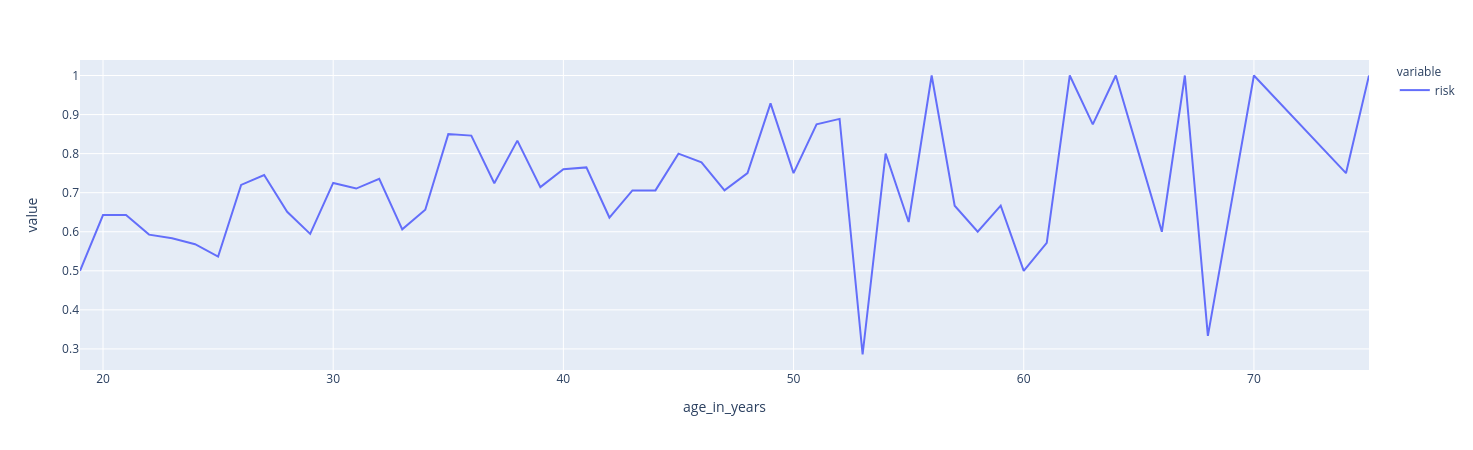

In [101]:
px.line(dataset.risk.groupby(dataset.age_in_years).mean())

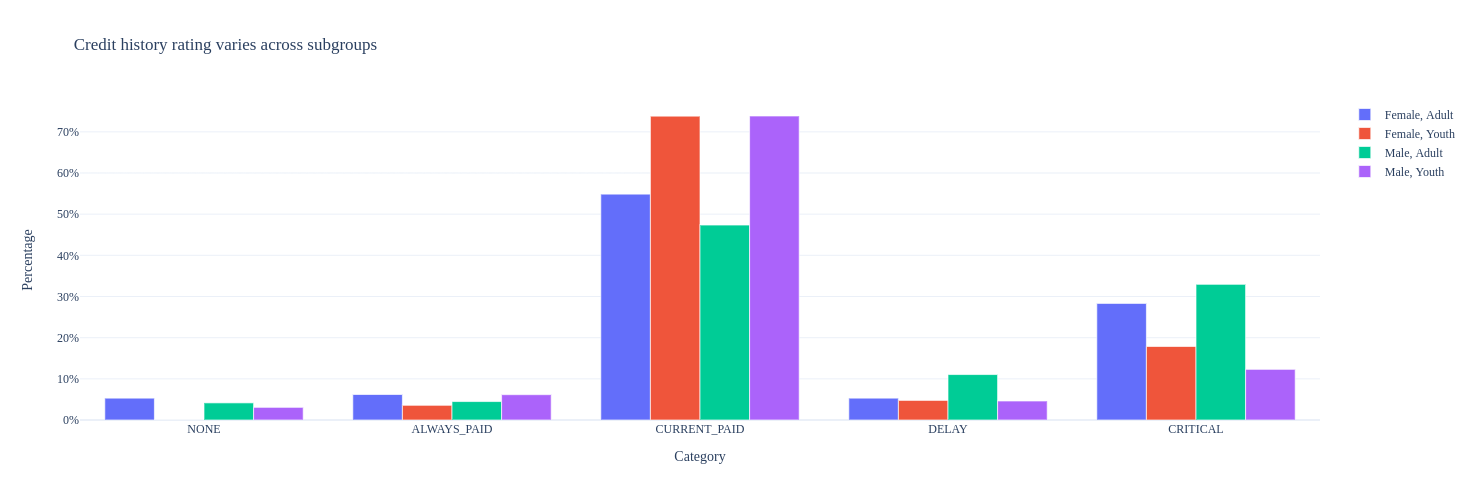

In [85]:
import plotly.express as px

fig = go.Figure()

statuses = ["NONE", "ALWAYS_PAID", "CURRENT_PAID", "DELAY", "CRITICAL"]
t = 0
for i, df in grouped:
    freq = pd.Series([(df.credit_history == status).mean() for status in statuses], index=statuses)
    fig.add_trace(go.Bar(x=freq.index, y=freq.values, name=groups[t]))
    t += 1
    
show(fig.update_layout(yaxis_tickformat="%"), "Credit history rating varies across subgroups", "Category", "Percentage").write_image("images/credit_ratings.pdf")